<a href="https://colab.research.google.com/github/nurulshifaside/Data-Science-Tasks/blob/main/1st%20Tasks/Data%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install matplotlib-venn

In [ ]:
pip install imbalanced-learn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Data Preparation

In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/stupen/heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Missing Value : Mencari missing value jika ada

In [ ]:
heart_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.

In [ ]:
dup = heart_data.duplicated()
dup

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
heart_data= heart_data.drop_duplicates()
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Outlier: Memeriksa outlier dan menangani outlier jika ada.

Thalach

<Axes: ylabel='thalach'>

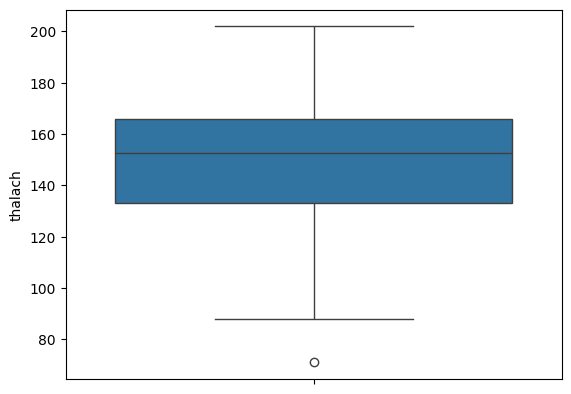

In [ ]:
import seaborn as sns
sns.boxplot(heart_data['thalach'])

In [ ]:
Q1 = np.percentile(heart_data['thalach'], 25)
Q3 = np.percentile(heart_data['thalach'], 75)
IQR = Q3-Q1
lower_limit_h = heart_data['thalach']<=(Q1-1.5*IQR)
upper_limit_h = heart_data['thalach']>=(Q3+1.5*IQR)

In [ ]:
heart_data[lower_limit_h]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
heart_data[upper_limit_h]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
clean_data_h = heart_data[~lower_limit_h & ~upper_limit_h]
clean_data_h

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Cholestoral

<Axes: ylabel='chol'>

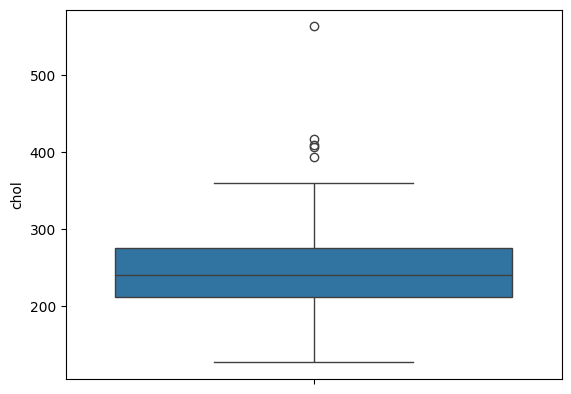

In [ ]:
import seaborn as sns
sns.boxplot(heart_data['chol'])

In [ ]:
Q1 = np.percentile(heart_data['chol'], 25)
Q3 = np.percentile(heart_data['chol'], 75)
IQR = Q3-Q1
lower_limit_c = heart_data['chol']<=(Q1-1.5*IQR)
upper_limit_c = heart_data['chol']>=(Q3+1.5*IQR)

In [ ]:
heart_data[lower_limit_c]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
heart_data[upper_limit_c]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
clean_data_c = heart_data[~lower_limit_c & ~upper_limit_c]
clean_data_c

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Blood Pressure

<Axes: ylabel='trestbps'>

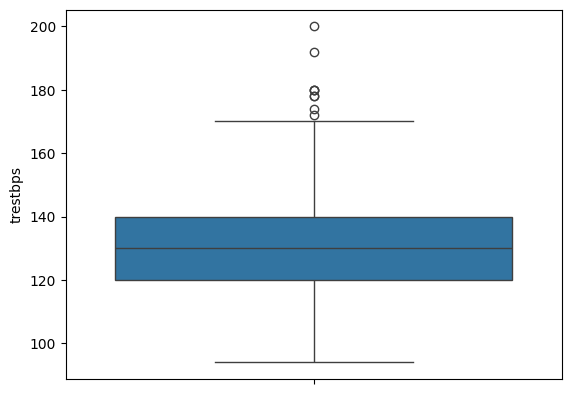

In [ ]:
import seaborn as sns
sns.boxplot(heart_data['trestbps'])

In [ ]:
Q1 = np.percentile(heart_data['trestbps'], 25)
Q3 = np.percentile(heart_data['trestbps'], 75)
IQR = Q3-Q1
lower_limit_t = heart_data['trestbps']<=(Q1-1.5*IQR)
upper_limit_t = heart_data['trestbps']>=(Q3+1.5*IQR)

In [ ]:
heart_data[lower_limit_t]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
heart_data[upper_limit_t]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
70,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [ ]:
heart_data['trestbps'][upper_limit_t] = heart_data[~lower_limit_t & ~upper_limit_t]['trestbps'].mean()
heart_data

<ipython-input-25-8c2562fef2a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['trestbps'][upper_limit_t] = heart_data[~lower_limit_t & ~upper_limit_t]['trestbps'].mean()
<ipython-input-25-8c2562fef2a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['trestbps'][upper_limit_t] = heart_data[~lower_limit_t & ~upper_limit_t]['trestbps'].mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120.0,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108.0,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128.0,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160.0,273,0,0,125,0,0.0,2,0,2,0


Oldpeak

<Axes: ylabel='oldpeak'>

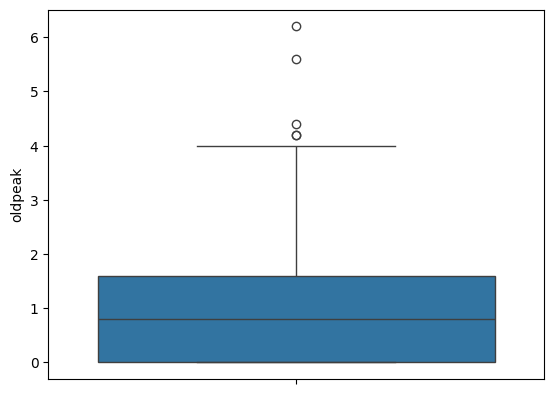

In [ ]:
import seaborn as sns
sns.boxplot(heart_data['oldpeak'])

In [ ]:
Q1 = np.percentile(heart_data['oldpeak'], 25)
Q3 = np.percentile(heart_data['oldpeak'], 75)
IQR = Q3-Q1
lower_limit_o = heart_data['oldpeak']<=(Q1-1.5*IQR)
upper_limit_o = heart_data['oldpeak']>=(Q3+1.5*IQR)

In [ ]:
heart_data[lower_limit_o]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
heart_data[upper_limit_o]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114.000000,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140.000000,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140.000000,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160.000000,164,0,0,145,0,6.2,0,3,3,0
77,63,1,0,140.000000,187,0,0,144,1,4.0,2,2,3,0
175,56,0,0,129.515571,288,1,0,133,1,4.0,0,2,3,0
450,63,0,0,150.000000,407,0,0,154,0,4.0,1,3,3,0
528,59,1,3,129.515571,270,0,0,145,0,4.2,0,0,3,1


In [ ]:
heart_data['oldpeak'][upper_limit_t] = heart_data[~lower_limit_o & ~upper_limit_o]['oldpeak'].mean()
heart_data

<ipython-input-30-5cfb312d3da7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['oldpeak'][upper_limit_t] = heart_data[~lower_limit_o & ~upper_limit_o]['oldpeak'].mean()
<ipython-input-30-5cfb312d3da7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['oldpeak'][upper_limit_t] = heart_data[~lower_limit_o & ~upper_limit_o]['oldpeak'].mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120.0,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108.0,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128.0,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160.0,273,0,0,125,0,0.0,2,0,2,0


Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

In [ ]:
from sklearn.utils import resample

heart_data['sex'].value_counts()
#1 = male. 0 = female

1    206
0     96
Name: sex, dtype: int64

In [ ]:
heart_m = heart_data[heart_data['sex']==1]
heart_m

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
6,58,1,0,114.0,318,0,2,140,0,4.4,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,52,1,0,108.0,233,1,1,147,0,0.1,2,3,3,1
720,64,1,2,140.0,335,0,1,158,0,0.0,2,0,2,0
739,52,1,0,128.0,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160.0,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
heart_f = heart_data[heart_data['sex']==0]
heart_f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100.0,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112.0,149,0,1,125,0,1.6,1,0,2,1
11,43,0,0,132.0,341,1,0,136,1,3.0,1,0,3,0
12,34,0,1,118.0,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,66,0,3,150.0,226,0,1,114,0,2.6,0,0,2,1
691,55,0,1,135.0,250,0,0,161,0,1.4,1,0,2,1
708,60,0,2,120.0,178,1,1,96,0,0.0,2,0,2,1
723,68,0,2,120.0,211,0,0,115,0,1.5,1,0,2,1


In [ ]:
heart_m_downsample = resample(heart_m, n_samples=len(heart_f))
heart_m_downsample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
843,59,1,3,160.0,273,0,0,125,0,0.0,2,0,2,0
14,52,1,0,128.0,204,1,1,156,1,1.0,1,0,0,0
154,63,1,0,130.0,330,1,0,132,1,1.8,2,3,3,0
89,68,1,0,144.0,193,1,1,141,0,3.4,1,2,3,0
116,63,1,0,130.0,254,0,0,147,0,1.4,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,42,1,0,140.0,226,0,1,178,0,0.0,2,0,2,1
148,52,1,3,152.0,298,1,1,178,0,1.2,1,0,3,1
57,48,1,1,130.0,245,0,0,180,0,0.2,1,0,2,1
9,54,1,0,122.0,286,0,0,116,1,3.2,1,2,2,0


Menggabungkan data laki-laki hasil down_sample dengan perempuan

In [ ]:
heart_downsample = pd.concat([heart_m_downsample,heart_f])
heart_downsample['sex'].value_counts()

1    96
0    96
Name: sex, dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0


Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
heart_data.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    129.515571
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.011954
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [ ]:
heart_data.median()

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [ ]:
from scipy import stats

mode_value = stats.mode(heart_downsample)
print("Modus", mode_value.mode[0])

Modus 54.0


Menemukan dan mendeskripsikan statistical five summaries

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,129.515571,246.500000,0.149007,0.526490,149.569536,0.327815,1.011954,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,14.421995,51.753489,0.356686,0.526027,22.903527,0.470196,1.105984,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,165.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mendeskripsikan distribusi data

<Axes: ylabel='Count'>

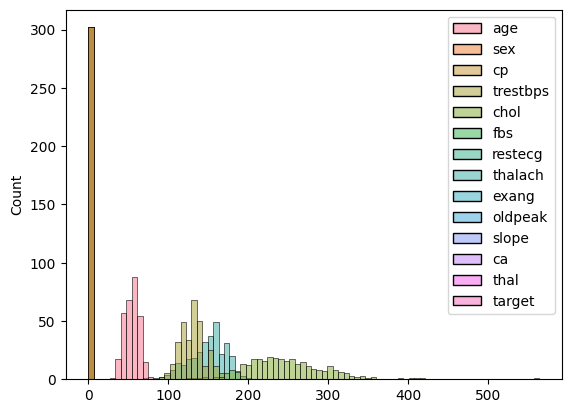

In [ ]:
sns.histplot(heart_data)

# Feature Engineering

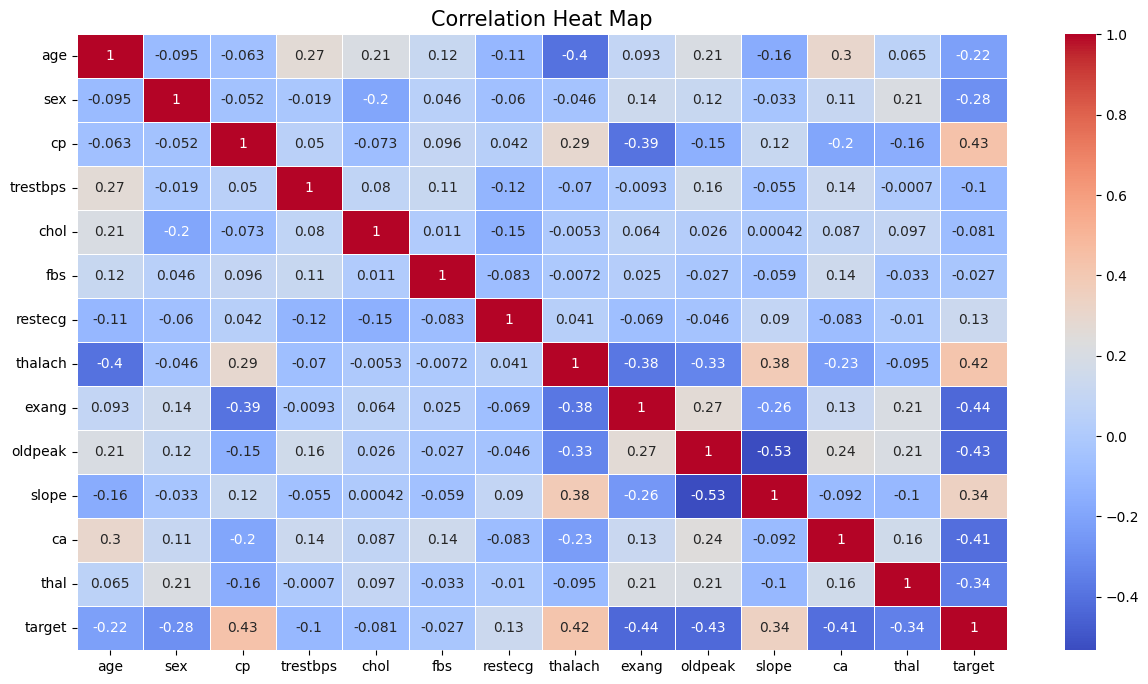

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(heart_data.corr(), annot = True, linewidth = 0.5, cmap = 'coolwarm')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [ ]:
age = heart_data[heart_data["age"] == 1]
chol = heart_data[heart_data["chol"] != 1]

print(age.shape)
print(heart_data.shape)

(0, 14)
(302, 14)


In [ ]:
heart_data_sex = pd.get_dummies(heart_data["sex"])
heart_data["sex"] = heart_data["sex"].replace({0: 'Male', 1: 'Female'})

<ipython-input-74-bc1c0d04b09a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data["sex"] = heart_data["sex"].replace({0: 'Male', 1: 'Female'})


In [ ]:
heart_data_sex

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
723,1,0
733,1,0
739,0,1
843,0,1


In [ ]:
heart = pd.concat([heart_data, heart_data_sex], axis = 1)

In [ ]:
heart.drop(['sex'], axis=1, inplace = True)

In [ ]:
heart

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,0,1
0,52,0,125.0,212,0,1,168,0,1.0,2,2,3,0,0,1
1,53,0,140.0,203,1,0,155,1,3.1,0,0,3,0,0,1
2,70,0,145.0,174,0,1,125,1,2.6,0,0,3,0,0,1
3,61,0,148.0,203,0,1,161,0,0.0,2,1,3,0,0,1
4,62,0,138.0,294,1,1,106,0,1.9,1,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,2,120.0,211,0,0,115,0,1.5,1,0,2,1,1,0
733,44,2,108.0,141,0,1,175,0,0.6,1,0,2,1,1,0
739,52,0,128.0,255,0,1,161,1,0.0,2,1,3,0,0,1
843,59,3,160.0,273,0,0,125,0,0.0,2,0,2,0,0,1


In [ ]:
import pandas as pd

Male = heart_data[heart_data["sex"] == 1]
Female = heart_data[heart_data["sex"] != 1]

print(Male.shape)
print(Female.shape)

(0, 14)
(302, 14)


In [ ]:
print(Female.shape[0])
print(Female["chol"].sum())
print(Female["chol"].sum()/Female.shape[0])

302
74443
246.5


In [ ]:
Female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Female,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53,Female,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70,Female,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,Female,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,Male,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Male,2,120.0,211,0,0,115,0,1.5,1,0,2,1
733,44,Male,2,108.0,141,0,1,175,0,0.6,1,0,2,1
739,52,Female,0,128.0,255,0,1,161,1,0.0,2,1,3,0
843,59,Female,3,160.0,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
Female.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.963576,129.515571,246.500000,0.149007,0.526490,149.569536,0.327815,1.011954,1.397351,0.718543,2.314570,0.543046
std,9.04797,1.032044,14.421995,51.753489,0.356686,0.526027,22.903527,0.470196,1.105984,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,3.000000,165.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


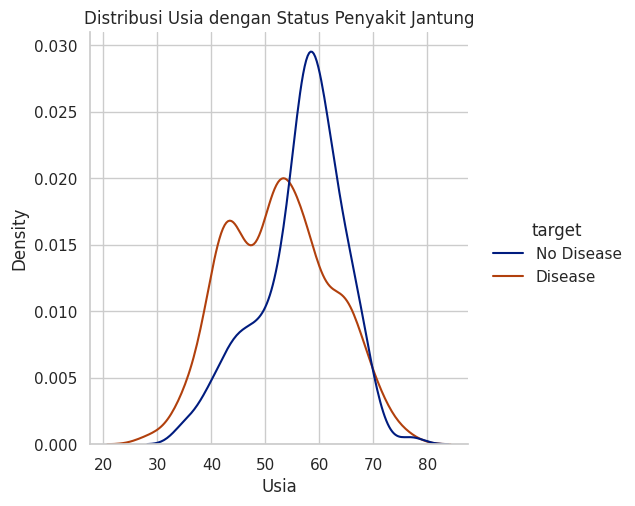

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data jantung dari file CSV
heart = pd.read_csv('/content/drive/MyDrive/stupen/heart.csv')

# Mengatur gaya plot
sns.set(style="whitegrid")

# Mengganti angka 0 dan 1 dengan label
heart['target'] = heart['target'].replace({0: 'No Disease', 1: 'Disease'})

# Membuat plot KDE dengan judul, label sumbu, dan palet warna yang mudah dibedakan
sns.displot(heart, x="age", hue="target", kind="kde", palette="dark")
plt.title('Distribusi Usia dengan Status Penyakit Jantung')
plt.xlabel('Usia')
plt.ylabel('Density')

# Menampilkan plot
plt.show()

Grafik di atas menunjukkan plot distribusi sebaran usia yang memiliki risiko tinggi terhadap kolesterol. Dari plot di atas, rentang usia risiko kolesterol berkisar 20 hingga 80 tahun. Data ini menunjukkan bahwa orang-orang dalam rentang usia tersebut memiliki risiko yang signifikan terhadap penyakit jantung. Oleh karena itu, sudah seharusnya kita harus meperhatikan pola hidup agar lebih sehat.